In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
Startups = pd.read_csv("50_Startups.csv")
Startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# EDA

In [4]:
Startups2=Startups.rename({'R&D Spend':'RD','Administration':'Admin','Marketing Spend':'MS'}, axis=1)
Startups2

,RD,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
Startups2.corr()

,RD,Admin,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


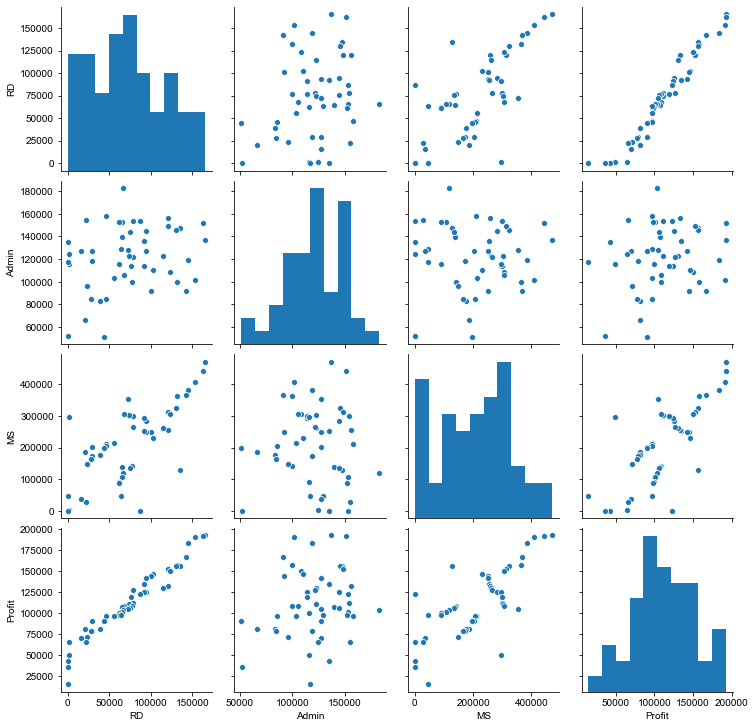

In [6]:
#Scatterplot between variables along with histograms

sns.pairplot(Startups2)#scatter plot for all the variables
sns.set_style(style='darkgrid')

In [7]:
#build model
#Y=Bo+B1.x1+B2.x2+B3.x3+B4.x4+....+e
#Profit=Bo+B1.R&D+B2.Admin+B3.MS
import statsmodels.formula.api as smf
model=smf.ols('Profit~ RD+Admin+MS',data=Startups2).fit()
model

In [8]:
model.params

Intercept    50122.192990
RD               0.805715
Admin           -0.026816
MS               0.027228
dtype: float64

In [9]:
model.tvalues , np.round(model.pvalues,5)

(Intercept     7.626218
 RD           17.846374
 Admin        -0.525507
 MS            1.655077
 dtype: float64,
 Intercept    0.00000
 RD           0.00000
 Admin        0.60176
 MS           0.10472
 dtype: float64)

In [10]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [11]:
#here P value of Admin and MS is more than alpha value

# Coefficients of administration and marketing spend are not contributing in fitiing the model 
# Let's check which one gives better model

# Colliniarity

SLR

In [12]:
slr_A=smf.ols('Profit~Admin',data=Startups2).fit()
slr_A.tvalues,np.round(slr_A.pvalues,5)

(Intercept    3.040044
 Admin        1.419493
 dtype: float64,
 Intercept    0.00382
 Admin        0.16222
 dtype: float64)

In [13]:
slr_A.rsquared

0.04028714077757223

In [14]:
slr_M=smf.ols('Profit~MS',data=Startups2).fit()
slr_M.tvalues,np.round(slr_M.pvalues,5)

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 Intercept    0.0
 MS           0.0
 dtype: float64)

In [15]:
slr_M.rsquared

0.5591535746115515

In [16]:
slr_AM=smf.ols('Profit~MS+Admin',data=Startups2).fit()
slr_AM.tvalues,np.round(slr_AM.pvalues,5)

(Intercept    1.142741
 MS           8.281039
 Admin        2.467779
 dtype: float64,
 Intercept    0.25893
 MS           0.00000
 Admin        0.01729
 dtype: float64)

In [17]:
slr_AM.rsquared

0.6097229746770663

VIF

In [18]:
rsq_Admin = smf.ols('Admin~MS+RD',data=Startups2).fit().rsquared  
vif_Admin = 1/(1-rsq_Admin)
vif_Admin

1.1750910070550458

In [19]:
rsq_MS = smf.ols('MS~Admin+RD',data=Startups2).fit().rsquared  
vif_MS = 1/(1-rsq_MS)
vif_MS

2.3267732905308773

In [20]:
rsq_RD = smf.ols('RD~Admin+MS',data=Startups2).fit().rsquared  
vif_RD = 1/(1-rsq_RD)
vif_RD

2.4689030699947017

In [21]:
# Putting the values in Dataframe format
d1={'Variables':['Admin','MS','RD'],
    'Vif':[vif_Admin,vif_MS,vif_RD]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Admin,1.175091
1,MS,2.326773
2,RD,2.468903


All the value in the VIF equation is less than 20 .So we can consider all the variable for model building.

# Residual Analysis

Test for Normality of Residuals (Q-Q Plot)

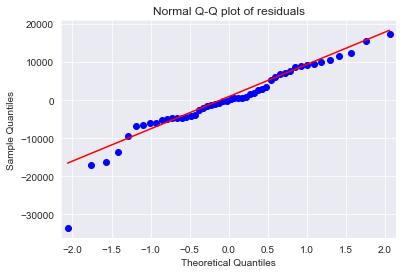

In [22]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [23]:
list(np.where(model.resid<-12000))

[array([14, 15, 48, 49], dtype=int64)]

# Residual plot for Homoscedasity

In [24]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

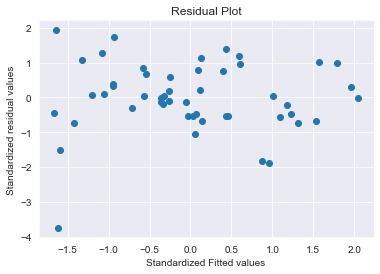

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Residual Vs Regressors

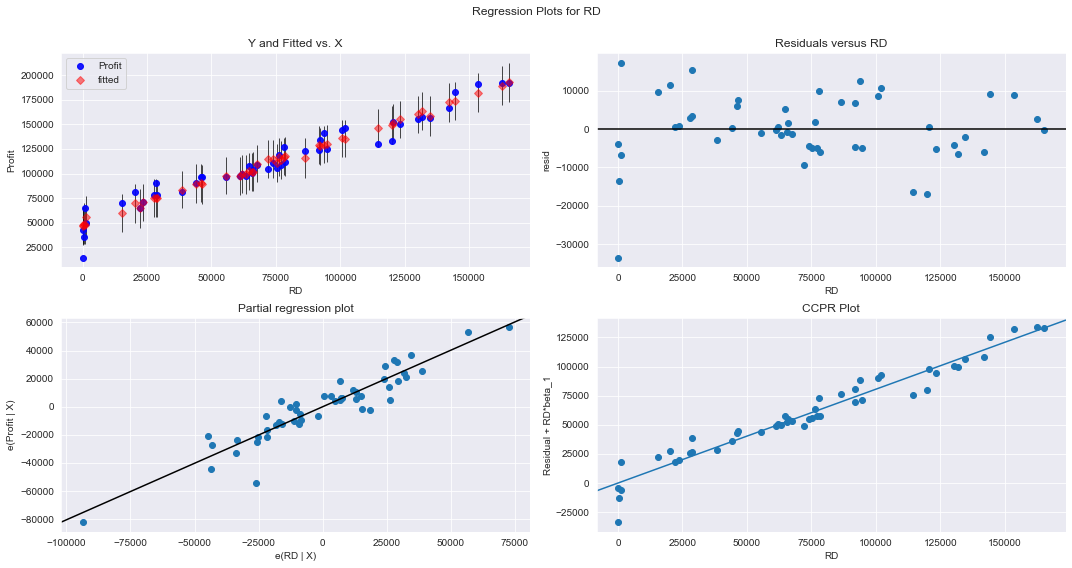

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

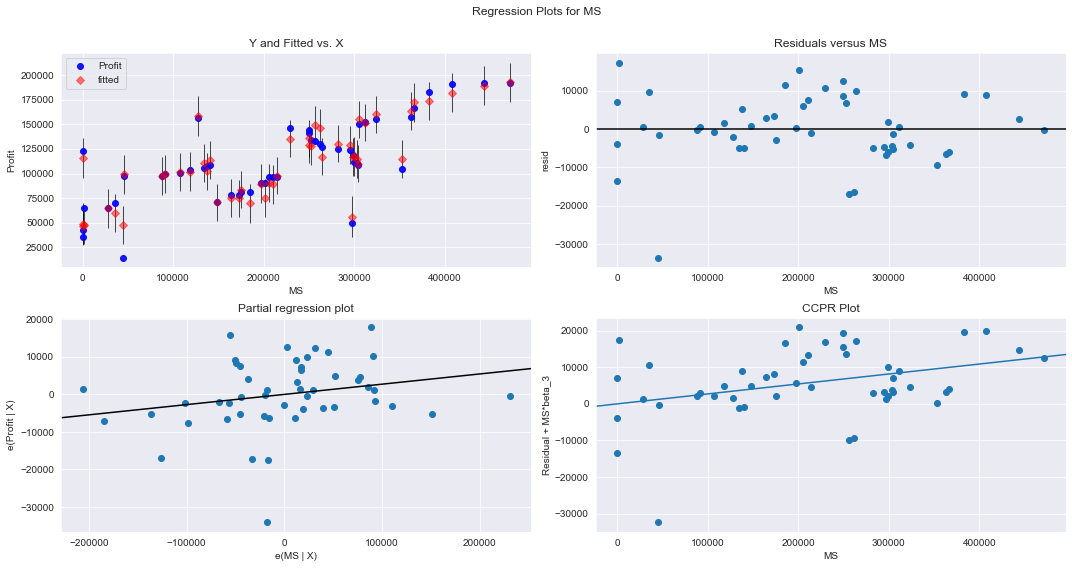

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

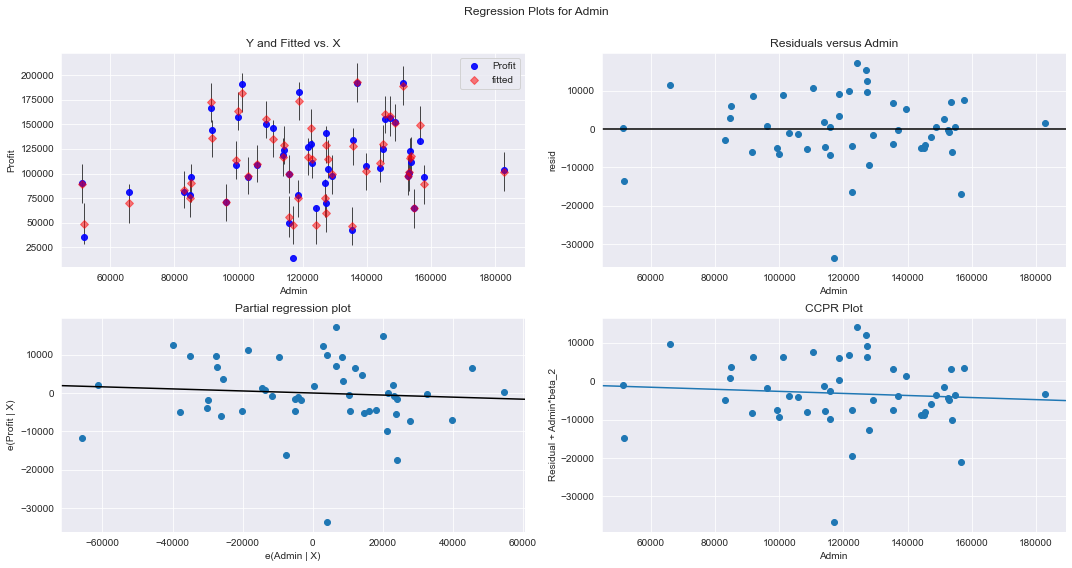

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Admin", fig=fig)
plt.show()

# Model Deletion Diagnostics
Detecting Influencers/Outliers
Cook’s Distance

In [29]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-30-23f4eec17c16>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(Startups2)), np.round(c, 3))


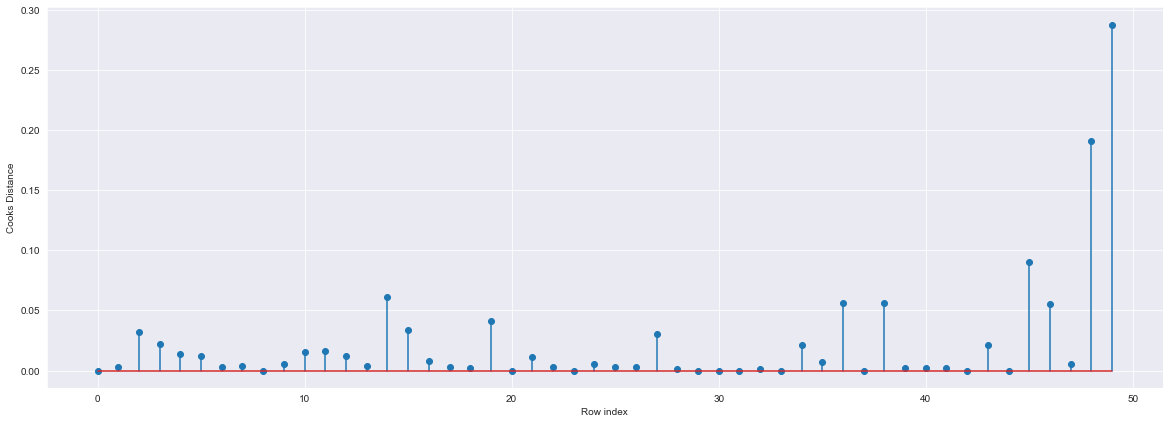

In [30]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Startups2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [31]:
#index and value of influencer where c at max
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

# High Influence Points

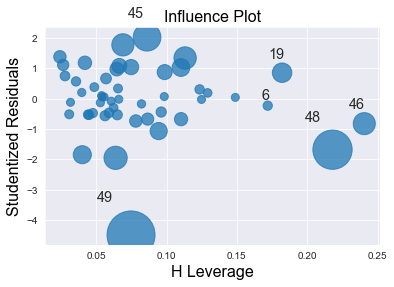

In [32]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [33]:
k = Startups.shape[1]
n = Startups.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [34]:
Startups2[Startups2.index.isin([48, 49, 46, 19])]

,RD,Admin,MS,State,Profit
19,86419.70,153514.11,0.00,New York,122776.86
46,1315.46,115816.21,297114.46,Florida,49490.75
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [35]:
Startups2.head()

,RD,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the model

In [36]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Startups3=Startups2.drop(Startups2.index[[19,46,48,49]],axis=0).reset_index()
Startups3

,index,RD,Admin,MS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [37]:
#Drop the original index
Startups3=Startups3.drop(['index'],axis=1)

In [38]:
Startups3.head()

,RD,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [39]:
Startups3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RD      46 non-null     float64
 1   Admin   46 non-null     float64
 2   MS      46 non-null     float64
 3   State   46 non-null     object 
 4   Profit  46 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.9+ KB


In [40]:
Startups3=Startups2.drop(Startups2.index[[45]],axis=0).reset_index()

In [41]:
Satrtups4=Startups3.drop(['index'],axis=1)

# Build Model

In [44]:
slr_A=smf.ols('Profit~RD+Admin',data=Satrtups4).fit()

In [45]:
slr_A.rsquared,slr_A.aic

(0.9497615589327058, 1036.3029347716883)

In [46]:
slr_M=smf.ols('Profit~RD+MS',data=Satrtups4).fit()

In [47]:
slr_M.rsquared,slr_M.aic

(0.9531302799584938, 1032.901910768062)

In [ ]:
#Comparing above R-Square and AIC values, model 'model_MS' has high R- square and low AIC value hence include variable 'MS' so that multi collinearity problem would be resolved.